In [15]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
drug_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
allDataMouseDrug = pd.merge(drug_data,mouse_data, how='left',left_on=['Mouse ID'],right_on=['Mouse ID'])
allDataMouseDrug.round({'Tumor Volume (mm3)': 1})

# Display the data table for preview
allDataMouseDrug.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [16]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanTumorVolume = allDataMouseDrug.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'mean'})

# Convert to DataFrame
meanTumorVolume = meanTumorVolume.reset_index(level=['Drug', 'Timepoint'])

# Preview DataFrame
meanTumorVolume.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [18]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standardErrorTumorVolume = allDataMouseDrug.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'sem'})

# Convert to DataFrame
standardErrorTumorVolume = standardErrorTumorVolume.reset_index(level=['Drug', 'Timepoint'])

# Preview DataFrame
standardErrorTumorVolume.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [19]:
# Minor Data Munging to Re-Format the Data Frames
transformedMouseDrugData = allDataMouseDrug.pivot_table('Tumor Volume (mm3)','Timepoint','Drug',aggfunc=np.mean)
# Preview that Reformatting worked
transformedMouseDrugData.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


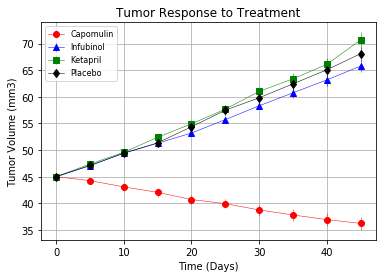

In [20]:
# Generate the Plot (with Error Bars)
TumorResponse_x_axisValues = transformedMouseDrugData.index.values

capomulin_y_axisValues = transformedMouseDrugData['Capomulin']
capomulin_y_errorValues = standardErrorTumorVolume['Tumor Volume (mm3)'].loc[standardErrorTumorVolume['Drug']=='Capomulin']
capomulin_plot = plt.errorbar(TumorResponse_x_axisValues, capomulin_y_axisValues, yerr = capomulin_y_errorValues, 
                              marker = 'o', color = 'red', label = 'Capomulin', linewidth = 0.5)

infubinol_y_axisValues = transformedMouseDrugData['Infubinol']
infubinol_y_errorValues = standardErrorTumorVolume['Tumor Volume (mm3)'].loc[standardErrorTumorVolume['Drug']=='Infubinol']
infubinol_plot = plt.errorbar(TumorResponse_x_axisValues, infubinol_y_axisValues, yerr = infubinol_y_errorValues,
                              marker = '^', color = 'blue',label = 'Infubinol', linewidth = 0.5)

ketapril_y_axisValues = transformedMouseDrugData['Ketapril']
ketapril_y_errorValues = standardErrorTumorVolume['Tumor Volume (mm3)'].loc[standardErrorTumorVolume['Drug']=='Ketapril']
ketapril_plot = plt.errorbar(TumorResponse_x_axisValues,ketapril_y_axisValues, yerr = ketapril_y_errorValues,
                         marker = 's', color = 'green', label = 'Ketapril', linewidth = 0.5)

placebo_y_axisValues = transformedMouseDrugData['Placebo']
placebo_y_errorValues = standardErrorTumorVolume['Tumor Volume (mm3)'].loc[standardErrorTumorVolume['Drug']=='Placebo']
placebo_plot = plt.errorbar(TumorResponse_x_axisValues, placebo_y_axisValues, yerr = placebo_y_errorValues,
                        marker = 'd', color = 'black', label = 'Placebo', linewidth = 0.5)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.legend(loc='upper left', prop={'size':8})


# Save the Figure
plt.savefig('Tumor_Response_to_Treatment.png')

# Show Figure
plt.show()


## Metastatic Response to Treatment

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meanMetaSite = allDataMouseDrug.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':'mean'})

# Convert to DataFrame
meanMetaSite = meanMetaSite.reset_index(level=['Drug', 'Timepoint'])

# Preview DataFrame
meanMetaSite.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [22]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standardErrorMetaSite = allDataMouseDrug.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':'sem'})

# Convert to DataFrame
standardErrorMetaSite = standardErrorMetaSite.reset_index(level=['Drug', 'Timepoint'])

# Preview DataFrame
standardErrorMetaSite.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [23]:
# Minor Data Munging to Re-Format the Data Frames
transformedMetaSiteData = allDataMouseDrug.pivot_table('Metastatic Sites','Timepoint','Drug',aggfunc=np.mean)

# Preview that Reformatting worked
transformedMetaSiteData.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


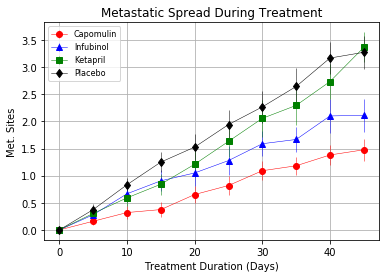

In [24]:
# Generate the Plot (with Error Bars)
MetaSite_x_axisValues = transformedMetaSiteData.index.values

MScapomulin_y_axisValues = transformedMetaSiteData['Capomulin']
MScapomulin_y_errorValues = standardErrorMetaSite['Metastatic Sites'].loc[standardErrorMetaSite['Drug']=='Capomulin']
MScapomulin_plot = plt.errorbar(MetaSite_x_axisValues, MScapomulin_y_axisValues, yerr = MScapomulin_y_errorValues, 
                              marker = 'o', color = 'red', label = 'Capomulin', linewidth = 0.5)

MSinfubinol_y_axisValues = transformedMetaSiteData['Infubinol']
MSinfubinol_y_errorValues = standardErrorMetaSite['Metastatic Sites'].loc[standardErrorMetaSite['Drug']=='Infubinol']
MSinfubinol_plot = plt.errorbar(MetaSite_x_axisValues, MSinfubinol_y_axisValues, yerr = MSinfubinol_y_errorValues,
                              marker = '^', color = 'blue',label = 'Infubinol', linewidth = 0.5)

MSketapril_y_axisValues = transformedMetaSiteData['Ketapril']
MSketapril_y_errorValues = standardErrorMetaSite['Metastatic Sites'].loc[standardErrorMetaSite['Drug']=='Ketapril']
MSketapril_plot = plt.errorbar(MetaSite_x_axisValues,MSketapril_y_axisValues, yerr = MSketapril_y_errorValues,
                         marker = 's', color = 'green', label = 'Ketapril', linewidth = 0.5)

MSplacebo_y_axisValues = transformedMetaSiteData['Placebo']
MSplacebo_y_errorValues = standardErrorMetaSite['Metastatic Sites'].loc[standardErrorMetaSite['Drug']=='Placebo']
MSplacebo_plot = plt.errorbar(MetaSite_x_axisValues, MSplacebo_y_axisValues, yerr = MSplacebo_y_errorValues,
                        marker = 'd', color = 'black', label = 'Placebo', linewidth = 0.5)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()
plt.legend(loc='upper left', prop={'size':8})

# Save the Figure
plt.savefig('Metastatic_Spread_During_Treatment.png')

# Show the Figure
plt.show()

## Survival Rates

In [25]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survivalRateMouseCount = allDataMouseDrug.groupby(['Drug','Timepoint']).agg({'Mouse ID':'count'})

# Convert to DataFrame
survivalRateMouseCount= survivalRateMouseCount.reset_index(level=['Drug', 'Timepoint'])
survivalRateMouseCount = survivalRateMouseCount.rename(columns = {"Mouse ID" : "Mouse Count"})

# Preview DataFrame
survivalRateMouseCount.head(5)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [26]:
# Minor Data Munging to Re-Format the Data Frames
transformedSurvivalRateData = allDataMouseDrug.pivot_table('Mouse ID','Timepoint','Drug',aggfunc = 'count')

# Preview the Data Frame
transformedSurvivalRateData.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


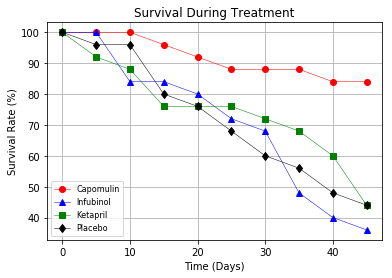

In [27]:
# Generate the Plot (Accounting for percentages)
survivalRate_x_axisValues = transformedSurvivalRateData.index.values
survivalRate_y_axisValues = transformedSurvivalRateData['Capomulin']/max(transformedSurvivalRateData['Capomulin'])*100
SRcapomulin_plot = plt.plot(survivalRate_x_axisValues, survivalRate_y_axisValues, 
                              marker = 'o', color = 'red', label = 'Capomulin', linewidth = 0.5)

survivalRate_y_axisValues = transformedSurvivalRateData['Infubinol']/max(transformedSurvivalRateData['Infubinol'])*100
SRcapomulin_plot = plt.plot(survivalRate_x_axisValues, survivalRate_y_axisValues, 
                              marker = '^', color = 'blue', label = 'Infubinol', linewidth = 0.5)

survivalRate_y_axisValues = transformedSurvivalRateData['Ketapril']/max(transformedSurvivalRateData['Ketapril'])*100
SRcapomulin_plot = plt.plot(survivalRate_x_axisValues, survivalRate_y_axisValues, 
                              marker = 's', color = 'green', label = 'Ketapril', linewidth = 0.5)

survivalRate_y_axisValues = transformedSurvivalRateData['Placebo']/max(transformedSurvivalRateData['Placebo'])*100
SRcapomulin_plot = plt.plot(survivalRate_x_axisValues, survivalRate_y_axisValues, 
                              marker = 'd', color = 'black',  label = 'Placebo', linewidth = 0.5)


plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.legend(loc='lower left', prop={'size':8})


# Save the Figure
plt.savefig('Survival_During_Treatment.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [28]:
# Calculate the percent changes for each drug

VolTransformChange = allDataMouseDrug.pivot_table('Tumor Volume (mm3)','Drug','Timepoint',aggfunc=np.mean)

avgVolChange = (VolTransformChange[max(VolTransformChange.columns.values)] - 
                 VolTransformChange[min(VolTransformChange.columns.values)])/VolTransformChange[min(VolTransformChange.columns.values)]*100

# Display the data to confirm
avgVolChange

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

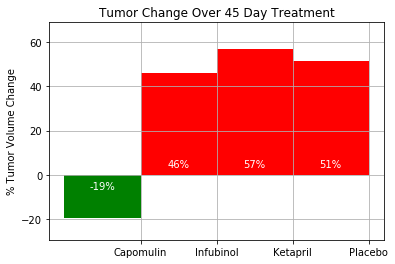

In [29]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs

reqdVar = ['Capomulin','Infubinol','Ketapril','Placebo']
reqAvgVolChange = avgVolChange[reqdVar]
colorV = []
for i in reqAvgVolChange:
    if i > 0:
        colorV.append('r')
    else: 
        colorV.append('g')
percentChangetuple = tuple(zip(reqdVar,reqAvgVolChange,colorV))


fig, ax = plt.subplots()
summaryPlot = ax.bar([x[0] for x in percentChangetuple], [x[1] for x in percentChangetuple], 
                      color = [x[2] for x in percentChangetuple],
                      align='edge', width = -1)


# Orient widths. Add labels, tick marks, etc. 
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_ylabel('% Tumor Volume Change')
ax.grid()

ax.set_ylim(min(reqAvgVolChange)-10,max(reqAvgVolChange)+12)
ax.set_yticks(np.arange(round(min(reqAvgVolChange)/10,0)*10, (round(max(reqAvgVolChange)/10,0)+1)*10, step=20))


# Use functions to label the percentages of changes
def barLabelData(rects,offset,scale):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., (np.sign(height)-offset)*scale,
                "{:.0f}%".format(height),
                ha='center', va='bottom', color = 'white')
    

    
# Call functions to implement the function calls    
barLabelData(summaryPlot,0.5,5)

# Save the Figure
plt.savefig('Survival_Summary_BarGraph.png')

# Show the Figure
plt.show()